# **Histogram Equalization**

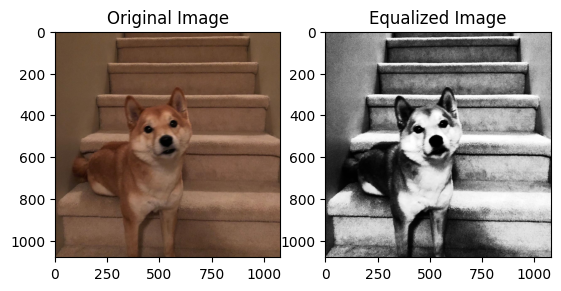

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def histogram_equalization(image):
    # Convert the image to grayscale if it's a color image
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(image)
    return equalized_image

image = cv2.imread('/content/img.jpg')
# Perform histogram equalization
equalized_image = histogram_equalization(image)

# Display the original and equalized images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.show()

# **Histogram Modifications**

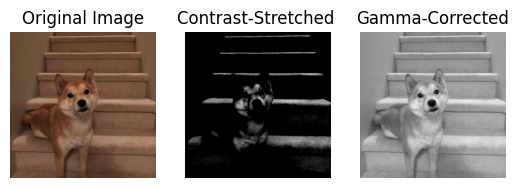

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def contrast_stretching(image, min_value, max_value):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    stretched_image = np.clip(image, min_value, max_value)
    return stretched_image

def gamma_correction(image, gamma):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gamma_corrected = np.power(image / 255.0, gamma) * 255.0
    return gamma_corrected.astype(np.uint8)

image = cv2.imread('/content/img.jpg')
stretched_image = contrast_stretching(image, 100, 200)
gamma_corrected = gamma_correction(image, 0.7)

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(stretched_image, cmap='gray')
plt.title('Contrast-Stretched ')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(gamma_corrected, cmap='gray')
plt.title('Gamma-Corrected')
plt.axis('off')
plt.show()

# **Fourier Transformation**

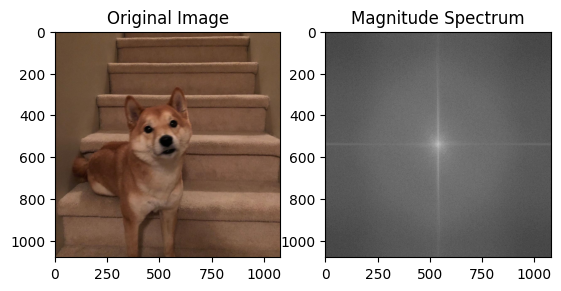

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def fourier_transform(image):
    if len(image.shape) > 2:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    f_transform = np.fft.fft2(image)
    f_transform_shifted = np.fft.fftshift(f_transform)
    magnitude_spectrum = np.abs(f_transform_shifted)
    magnitude_spectrum_log = np.log(magnitude_spectrum + 1)

    return magnitude_spectrum_log
image = cv2.imread('/content/img.jpg')

# Perform Fourier Transform
magnitude_spectrum = fourier_transform(image)

# Display the original and magnitude spectrum images
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.show()

# **Geometric Transformation**

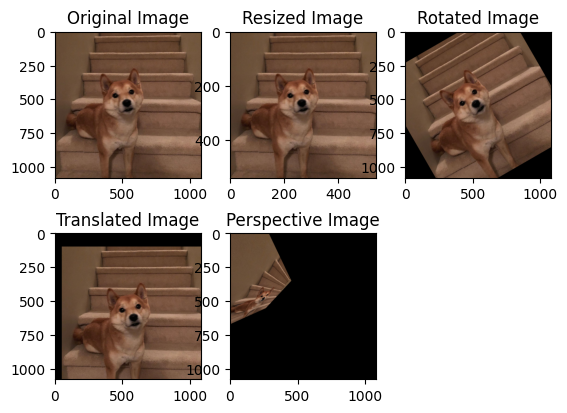

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/img.jpg')
resized_image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
angle = 30
rows, cols = image.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
tx, ty = 50, 100
translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
pts1 = np.float32([[100, 100], [200, 100], [100, 200], [200, 200]])
pts2 = np.float32([[150, 100], [250, 200], [100, 250], [200, 300]])
perspective_matrix = cv2.getPerspectiveTransform(pts1, pts2)
perspective_image = cv2.warpPerspective(image, perspective_matrix, (cols, rows))
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.subplot(2, 3, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.subplot(2, 3, 3)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')
plt.subplot(2, 3, 4)
plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.subplot(2, 3, 5)
plt.imshow(cv2.cvtColor(perspective_image, cv2.COLOR_BGR2RGB))
plt.title('Perspective Image')
plt.show()

# **Projected Transformation**

In [ ]:
from google.colab.patches import cv2_imshow

Original Image


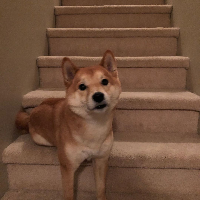


Projected Transformation


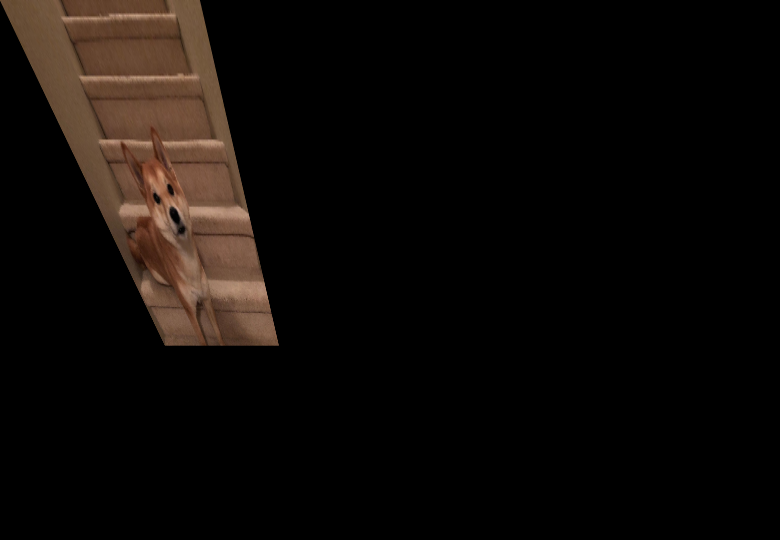

In [ ]:
import cv2
import numpy as np

image = cv2.imread('/content/img.jpg')
img = cv2.resize(image, (200, 200))

src_points = np.float32([[0,0], [cols-1,0], [0,rows-1], [cols-1,rows-1]])
dst_points = np.float32([[0,0], [cols-1,0], [int(0.33*cols),rows-1], [int(0.66*cols),rows-1]])
projective_matrix = cv2.getPerspectiveTransform(src_points, dst_points)
img_output = cv2.warpPerspective(img, projective_matrix, (cols,rows))

print("Original Image")
cv2_imshow(img)
print()
print("Projected Transformation")
cv2_imshow(img_output)


# **Affine Transformation**

In [ ]:
from google.colab.patches import cv2_imshow

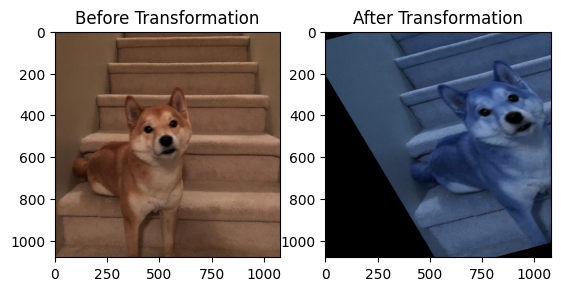

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('/content/img.jpg')
rows, cols, ch = img.shape

pts1 = np.float32([[50, 50],
				[200, 50],
				[50, 200]])

pts2 = np.float32([[10, 100],
				[200, 50],
				[100, 250]])

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121)
# plt.imshow(img)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Before Transformation')

plt.subplot(122)
plt.imshow(dst)
plt.title('After Transformation')

plt.show()

# **Adding Different type of Noise to Image**

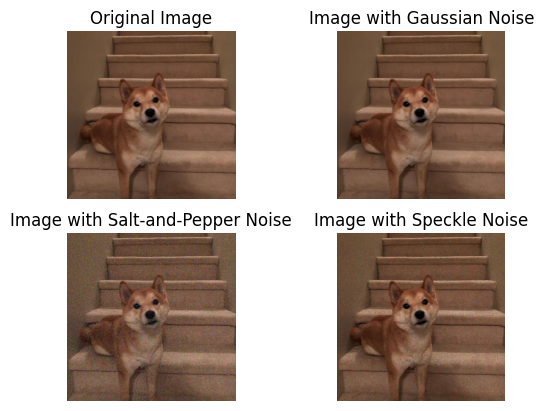

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/img.jpg')
# Add Gaussian noise to the image
mean = 0
variance = 0.1
gaussian_noise = np.random.normal(mean, variance ** 0.5, image.shape)
noisy_image_gaussian = np.clip(image + gaussian_noise, 0, 255).astype(np.uint8)
# Add Salt-and-Pepper noise to the image
prob_salt = 0.05
prob_pepper = 0.05
salt_pepper_noise = np.random.rand(*image.shape)
noisy_image_salt_pepper = image.copy()
noisy_image_salt_pepper[salt_pepper_noise < prob_salt] = 255
noisy_image_salt_pepper[salt_pepper_noise > 1 - prob_pepper] = 0
# Add Speckle noise to the image
variance_speckle = 0.1
speckle_noise = np.random.normal(mean, variance_speckle ** 0.5, image.shape)
noisy_image_speckle = np.clip(image + image * speckle_noise, 0, 255).astype(np.uint8)
# Display the original and noisy images
plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(cv2.cvtColor(noisy_image_gaussian, cv2.COLOR_BGR2RGB))
plt.title('Image with Gaussian Noise')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(noisy_image_salt_pepper, cv2.COLOR_BGR2RGB))
plt.title('Image with Salt-and-Pepper Noise')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(noisy_image_speckle, cv2.COLOR_BGR2RGB))
plt.title('Image with Speckle Noise')
plt.axis('off')
plt.show()

# **Filters**

## **Arithmetic Filter**

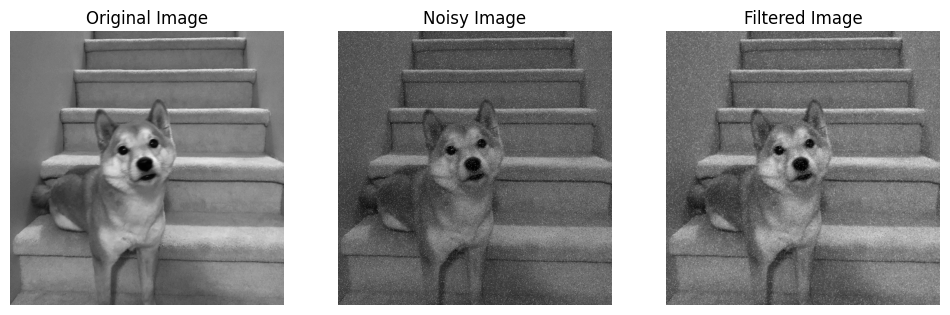

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_pepper_noise(image, probability):
    h, w = image.shape
    mask = np.random.rand(h, w) < probability / 2
    noisy_image = np.copy(image)
    noisy_image[mask] = 0  # Pepper noise (black)
    mask = np.random.rand(h, w) < probability / 2
    noisy_image[mask] = 255  # Salt noise (white)
    return noisy_image
def arithmetic_mean_filter(image, kernel_size):
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image
image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)
probability = 0.05  # Adjust this value to control the amount of pepper noise
noisy_image = add_pepper_noise(image, probability)
kernel_size = 3
filtered_image = arithmetic_mean_filter(noisy_image, kernel_size)
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()


## **Median Filter**

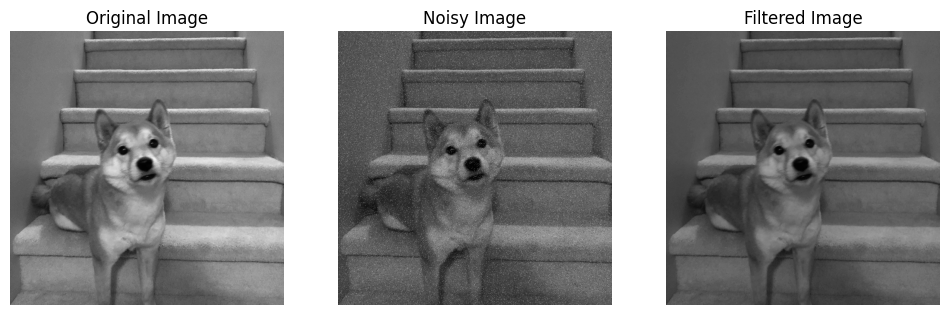

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_pepper_noise(image, probability):
    h, w = image.shape
    mask = np.random.rand(h, w) < probability / 2
    noisy_image = np.copy(image)
    noisy_image[mask] = 0  # Pepper noise (black)
    mask = np.random.rand(h, w) < probability / 2
    noisy_image[mask] = 255  # Salt noise (white)
    return noisy_image
def median_filter(image, kernel_size):
    filtered_image = cv2.medianBlur(image, kernel_size)
    return filtered_image
image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)
probability = 0.05  # Adjust this value to control the amount of pepper noise
noisy_image = add_pepper_noise(image, probability)
kernel_size = 3
filtered_image = median_filter(noisy_image, kernel_size)
plt.figure(figsize=(12, 8))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

## **Harmonic and Geometric Filter**

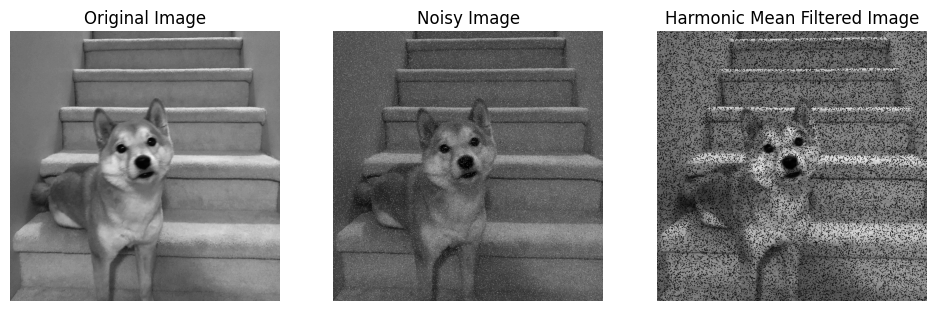

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
def add_pepper_noise(image, probability):
    h, w = image.shape
    mask = np.random.rand(h, w) < probability / 2
    noisy_image = np.copy(image)
    noisy_image[mask] = 0  # Pepper noise (black)
    mask = np.random.rand(h, w) < probability / 2
    noisy_image[mask] = 255  # Salt noise (white)
    return noisy_image
def harmonic_mean_filter(image, kernel_size):
    reciprocal_image = cv2.divide(1.0, image + 1.0)  # Avoid division by zero
    filtered_image = (kernel_size * kernel_size) / cv2.boxFilter(reciprocal_image, -1, (kernel_size, kernel_size))
    return filtered_image
image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)
probability = 0.05  # Adjust this value to control the amount of pepper noise
noisy_image = add_pepper_noise(image, probability)
kernel_size = 3
filtered_image_harmonic = harmonic_mean_filter(noisy_image, kernel_size)
plt.figure(figsize=(16, 8))
plt.subplot(1, 4, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 4, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 4, 3)
plt.imshow(filtered_image_harmonic, cmap='gray')
plt.title('Harmonic Mean Filtered Image')
plt.axis('off')
plt.show()

## **Geometric Mean Filter**

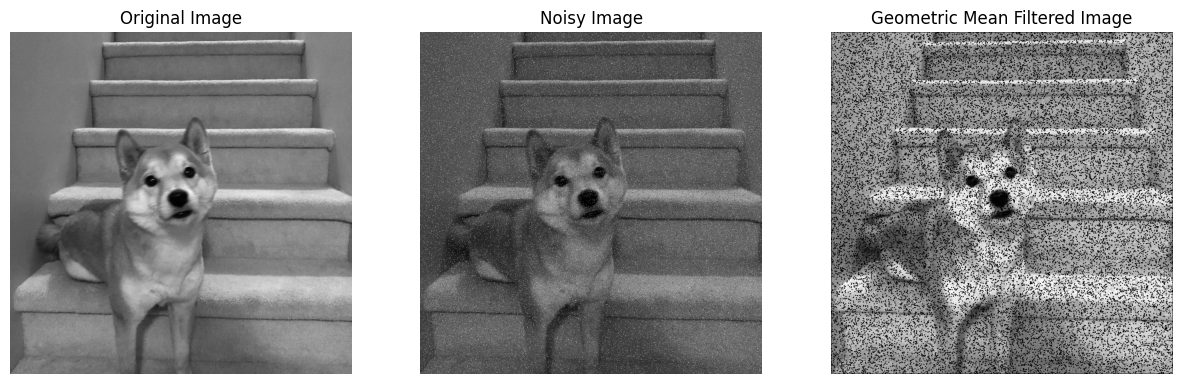

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def add_salt_and_pepper_noise(image, probability):
    h, w = image.shape
    mask = np.random.rand(h, w) < probability / 2
    noisy_image = np.copy(image)
    noisy_image[mask] = 0  # Pepper noise (black)
    mask = np.random.rand(h, w) < probability / 2
    noisy_image[mask] = 255  # Salt noise (white)
    return noisy_image
def geometric_mean_filter(image, kernel_size):
    height, width = image.shape
    filtered_image = np.zeros((height, width), dtype=np.uint8)
    half_kernel = kernel_size // 2
    for y in range(half_kernel, height - half_kernel):
        for x in range(half_kernel, width - half_kernel):
            kernel = image[y - half_kernel: y + half_kernel + 1, x - half_kernel: x + half_kernel + 1]
            geometric_mean = np.prod(kernel) ** (1 / (kernel_size * kernel_size))
            filtered_image[y, x] = geometric_mean
    return filtered_image
image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)
probability = 0.05  # Adjust this value to control the amount of noise
noisy_image = add_salt_and_pepper_noise(image, probability)
kernel_size = 3
filtered_image = geometric_mean_filter(noisy_image, kernel_size)
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(filtered_image, cmap='gray')
plt.title('Geometric Mean Filtered Image')
plt.axis('off')
plt.show()

## **Colour Enhancement**

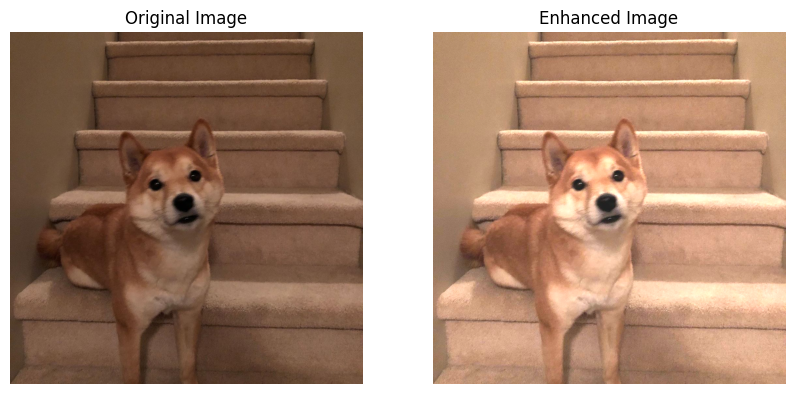

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def enhance_color(image, alpha=1.0, beta=0):
    enhanced_image = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return enhanced_image

# Load the image (replace 'path_to_your_image.jpg' with the image file path)
image = cv2.imread('/content/img.jpg')

# Enhance the color of the image
enhanced_image = enhance_color(image, alpha=1.5, beta=30)

# Display the original and enhanced images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(enhanced_image, cv2.COLOR_BGR2RGB))
plt.title('Enhanced Image')
plt.axis('off')

plt.show()


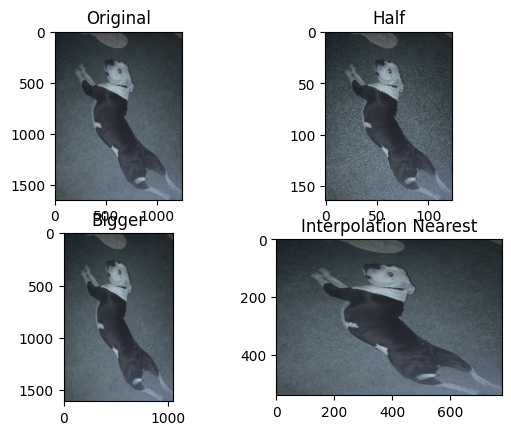

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread(r"/content/animal.jpg", 1)
# Loading the image

half = cv2.resize(image, (0, 0), fx = 0.1, fy = 0.1)
bigger = cv2.resize(image, (1050, 1610))

stretch_near = cv2.resize(image, (780, 540),
			interpolation = cv2.INTER_LINEAR)


Titles =["Original", "Half", "Bigger", "Interpolation Nearest"]
images =[image, half, bigger, stretch_near]
count = 4

for i in range(count):
	plt.subplot(2, 2, i + 1)
	plt.title(Titles[i])
	plt.imshow(images[i])

plt.show()


# **Feature Extraction**

In [ ]:
pip install scikit-image

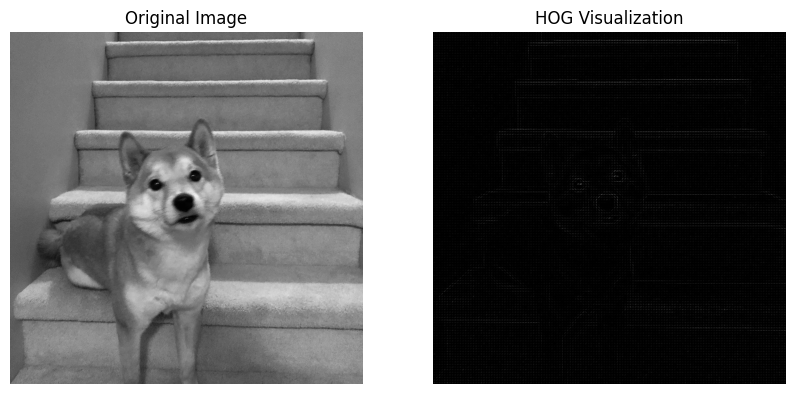

In [ ]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

# Load the image (replace 'path_to_your_image.jpg' with the image file path)
image = cv2.imread('/content/img.jpg', cv2.IMREAD_GRAYSCALE)

# Define HOG parameters
orientations = 9
pixels_per_cell = (8, 8)
cells_per_block = (2, 2)

# Compute HOG features
hog_features, hog_image = hog(image, orientations=orientations, pixels_per_cell=pixels_per_cell,
                             cells_per_block=cells_per_block, visualize=True)

# Display the original image and the HOG visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Visualization')
plt.axis('off')

plt.show()


# **Canny Edge Detection**

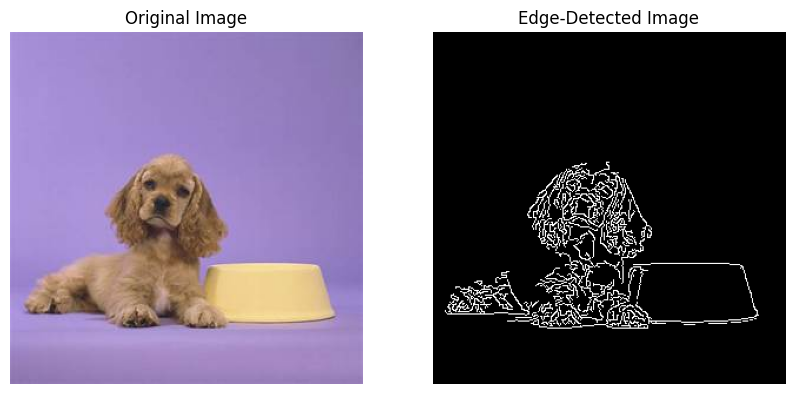

In [ ]:
import cv2
import matplotlib.pyplot as plt

def apply_canny_edge_detection(image, min_threshold, max_threshold):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_image, min_threshold, max_threshold)
    return edges
image = cv2.imread('/content/dog.jpeg')

# Set the minimum and maximum threshold for Canny edge detection
min_threshold = 50
max_threshold = 150

# Apply Canny edge detection
edges = apply_canny_edge_detection(image, min_threshold, max_threshold)

# Display the original and edge-detected images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image')
plt.axis('off')
plt.show()

# **DOG edge detection**

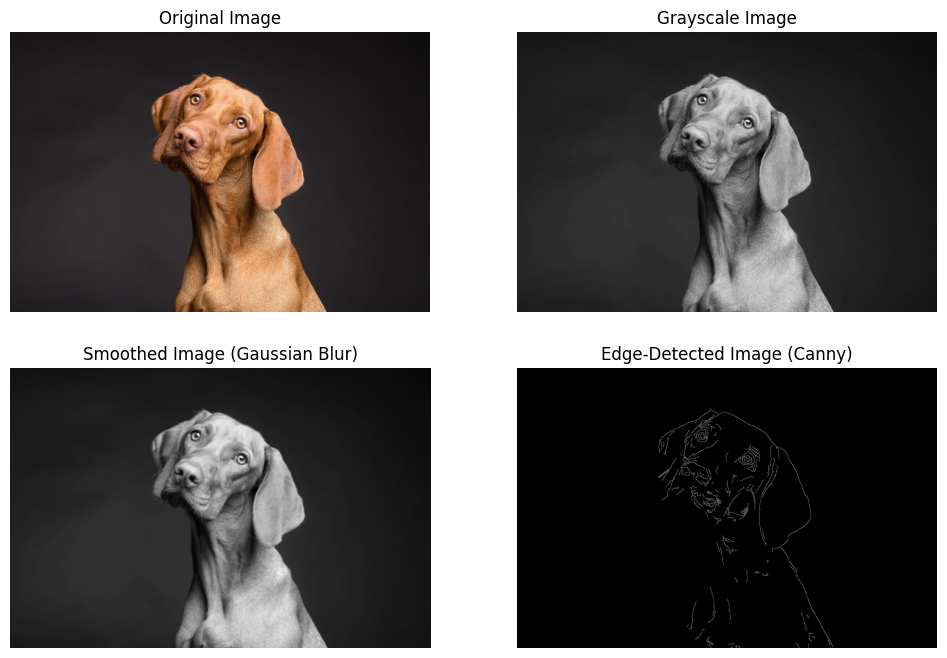

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (replace 'path_to_your_image.jpg' with the image file path)
image = cv2.imread('/content/dogg.jpg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
sigma = 1.8  # Adjust the sigma value as needed for the desired smoothing effect
smoothed_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

# Perform Canny edge detection on the smoothed image
min_threshold = 30  # Adjust the threshold values as needed
max_threshold = 100
edges = cv2.Canny(smoothed_image, min_threshold, max_threshold)

# Display the original image, grayscale image, smoothed image, and edge-detected image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges, cmap='gray')
plt.title('Edge-Detected Image (Canny)')
plt.axis('off')

plt.show()

# **Sobel Operator**

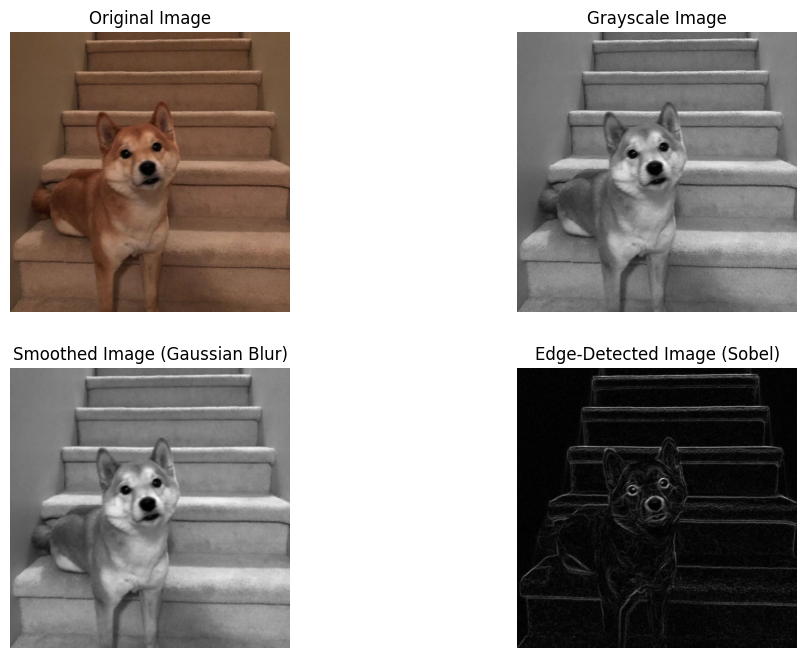

In [ ]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('/content/img.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

sigma = 1.5
smoothed_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

edges_sobel = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_sobel, cmap='gray')
plt.title('Edge-Detected Image (Sobel)')
plt.axis('off')
plt.show()

# **LOG operator**

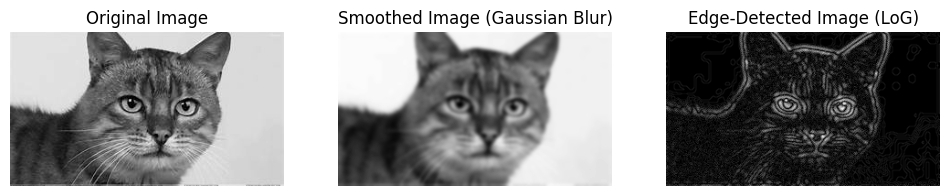

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image (replace 'path_to_your_image.jpg' with the image file path)
image = cv2.imread('/content/cat.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian smoothing
sigma = 1.8  # Adjust the sigma value as needed for the desired smoothing effect
smoothed_image = cv2.GaussianBlur(image, (0, 0), sigma)

# Apply Laplacian of Gaussian (LoG)
log_image = cv2.Laplacian(smoothed_image, cv2.CV_64F)

# Convert the result to the absolute value
log_image_abs = np.abs(log_image)

# Convert the result to 8-bit for visualization
log_image_8bit = np.uint8(log_image_abs)

# Display the original image, smoothed image, and LoG edge-detected image
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(log_image_8bit, cmap='gray')
plt.title('Edge-Detected Image (LoG)')
plt.axis('off')

plt.show()


# **Scharr**

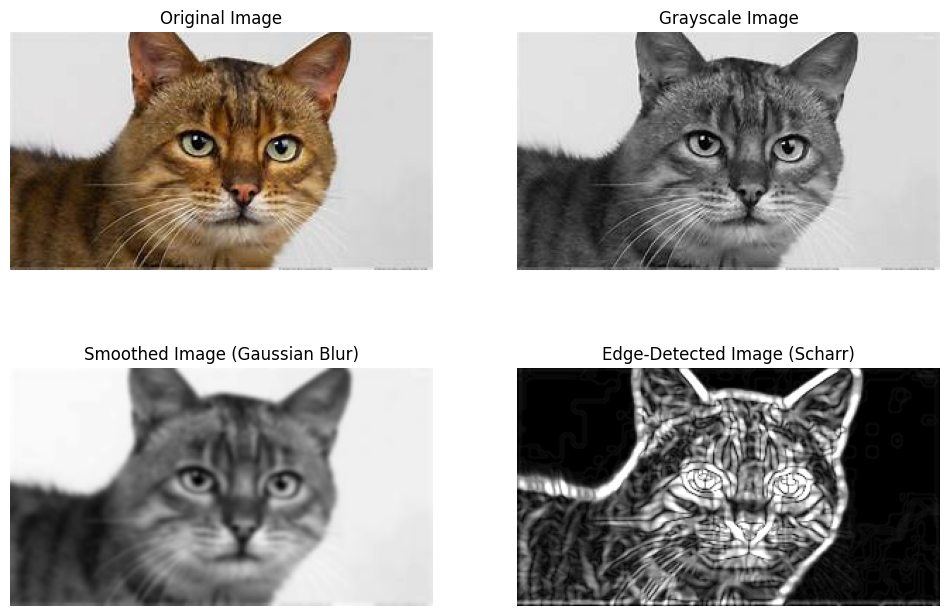

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image (replace 'path_to_your_image.jpg' with the image file path)
image = cv2.imread('/content/cat.jpeg')

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian smoothing to the grayscale image
sigma = 1.5  # Adjust the sigma value as needed for the desired smoothing effect
smoothed_image = cv2.GaussianBlur(gray_image, (0, 0), sigma)

# Perform edge detection using the Scharr operator
sobel_x = cv2.Scharr(smoothed_image, cv2.CV_64F, 1, 0)
sobel_y = cv2.Scharr(smoothed_image, cv2.CV_64F, 0, 1)

# Combine the gradient images
edges_scharr = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)

# Display the original image, grayscale image, smoothed image, and edge-detected image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(smoothed_image, cmap='gray')
plt.title('Smoothed Image (Gaussian Blur)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(edges_scharr, cmap='gray')
plt.title('Edge-Detected Image (Scharr)')
plt.axis('off')

plt.show()

# **----------------------------------------------------------------------------------------------------**

# **Object detection**

In [ ]:
!pip install opencv-python

In [ ]:
pip install tensorflow tensorflow-hub opencv-python

In [ ]:
pip install torch torchvision detectoR

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 997.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of detector to determine which version is compatible with other requirements. This could take a while.
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.4 MB/s eta 0:00:00
  Created wheel for detectoR: filename=Detector-2.0-py3-none-any.whl size=11204 sha256=e752ee2e717c33facf7464c0468fe3fd7fda5db526ec0ede3af45ad92b491872
  Stored in directory: /root/.cache/pip/wheels/21/69/35/645911966f4af60c210887bf2d73b526738a8d80a09b9e1779
  Created wheel for pgpdump: filename=pgpdump-1.5-py3-none-any.whl size=19944 sha256=793d81c05bb5a98097f1e684e3afd211f2b407a4d3573c4d9e82203b485912e7
  Stored in directory: /root/.cache/pip/wheels/61/85/ff/d394e3c6aaad30ee90e002d029

In [ ]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.transforms import functional as F
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt


In [ ]:
model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 138MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [ ]:
def preprocess_image(image_path):
    image = Image.open(image_path)
    image = F.to_tensor(image).unsqueeze(0)
    return image

image_path = "/content/dogs.jpg"
image = preprocess_image(image_path)


In [ ]:
with torch.no_grad():
    predictions = model(image)


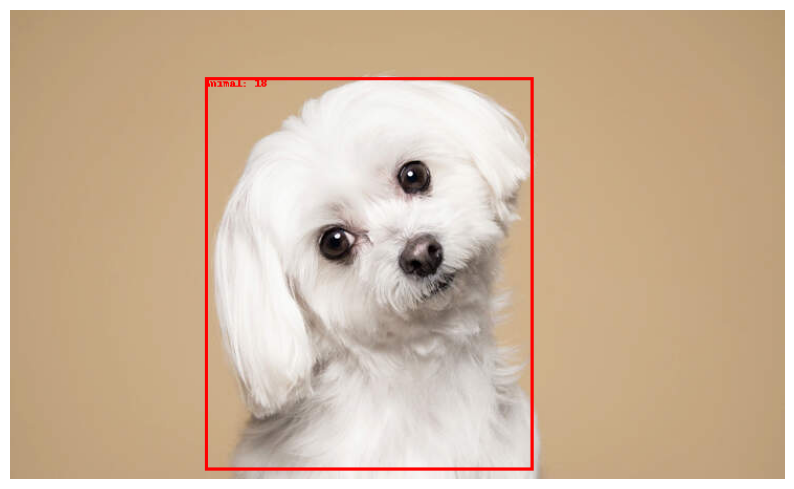

In [ ]:
def visualize_results(image, predictions, threshold=0.5):
    image = F.to_pil_image(image.squeeze(0))
    draw = ImageDraw.Draw(image)

    for score, label, box in zip(predictions[0]["scores"], predictions[0]["labels"], predictions[0]["boxes"]):
        if score < threshold:
            continue
        box = [round(i, 2) for i in box.tolist()]
        draw.rectangle(box, outline="red", width=3)
        draw.text((box[0], box[1]), f"Animal: {label}", fill="red")

    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

visualize_results(image, predictions)


# **GROUND TRUTH**

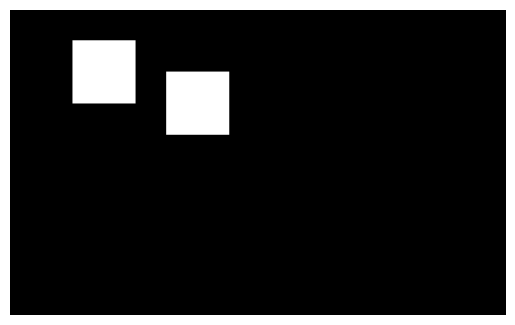

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/detect1.png')
mask = np.zeros_like(image, dtype=np.uint8)

bbox1 = [100, 50, 200, 150]  # Format: [x_min, y_min, x_max, y_max]
bbox2 = [250, 100, 350, 200]

cv2.rectangle(mask, (bbox1[0], bbox1[1]), (bbox1[2], bbox1[3]), (255, 255, 255), thickness=cv2.FILLED)
cv2.rectangle(mask, (bbox2[0], bbox2[1]), (bbox2[2], bbox2[3]), (255, 255, 255), thickness=cv2.FILLED)

cv2.imwrite('image_mask.png', mask)
plt.imshow(mask)
plt.axis('off')
plt.show()

# **PREDICTED TRUTH**

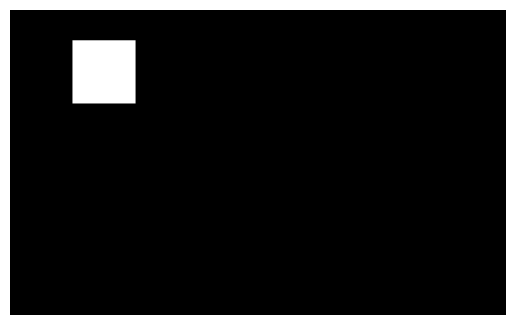

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('/content/detect1.png')

mask = np.zeros_like(image, dtype=np.uint8)

bbox = [100, 50, 200, 150]  # Format: [x_min, y_min, x_max, y_max]

cv2.rectangle(mask, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (255, 255, 255), thickness=cv2.FILLED)

cv2.imwrite('image_predicted_mask.png', mask)
plt.imshow(mask)
plt.axis('off')
plt.show()

# **FINAL ANSWER**

In [ ]:
import cv2
import numpy as np

# Load ground truth and predicted masks
ground_truth_mask = cv2.imread('/content/dummy1.png', cv2.IMREAD_GRAYSCALE)
predicted_mask = cv2.imread('/content/dummy2.png', cv2.IMREAD_GRAYSCALE)

# Threshold the masks to binary (0 or 255) for pixel accuracy calculation
ground_truth_mask_binary = (ground_truth_mask > 0).astype(np.uint8) * 255
predicted_mask_binary = (predicted_mask > 0).astype(np.uint8) * 255

# Calculate pixel accuracy
pixel_accuracy = (ground_truth_mask_binary == predicted_mask_binary).mean()

# Calculate intersection and union for IoU
intersection = np.logical_and(ground_truth_mask_binary, predicted_mask_binary)
union = np.logical_or(ground_truth_mask_binary, predicted_mask_binary)

# Calculate IoU (Jaccard Index)
iou = intersection.sum() / union.sum()

# Calculate Dice coefficient (F1 Score)
dice_coefficient = (2 * intersection.sum()) / (ground_truth_mask_binary.sum() + predicted_mask_binary.sum())

# Print the metrics
print(f"Pixel Accuracy: {pixel_accuracy:.4f}")
print(f"IoU (Jaccard Index): {iou:.4f}")
print(f"Dice Coefficient (F1 Score): {dice_coefficient:.4f}")


Pixel Accuracy: 0.9755
IoU (Jaccard Index): 0.8314
Dice Coefficient (F1 Score): 0.0036
